# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Rohit Nikat

**Student ID:** 202201040129

**Date of Submission:** 08-04-2025




**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [4]:
#Code for Part 1
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Load dataset
file_path = "/content/ModHayes_test.csv"
df = pd.read_csv(file_path)

# Display basic dataset information
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nLabel Distribution:")
print(df['topics'].value_counts())

# Text Preprocessing Functions
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

def apply_stemming(text):
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(word) for word in text.split()])

def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)
df['stemmed_text'] = df['clean_text'].apply(apply_stemming)
df['lemmatized_text'] = df['clean_text'].apply(apply_lemmatization)

# Vectorization
vectorizer_tf_idf = TfidfVectorizer()
tf_idf_matrix = vectorizer_tf_idf.fit_transform(df['lemmatized_text'])

vectorizer_count = CountVectorizer()
count_matrix = vectorizer_count.fit_transform(df['lemmatized_text'])

print("TF-IDF Matrix Shape:", tf_idf_matrix.shape)
print("Count Vectorizer Matrix Shape:", count_matrix.shape)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         722 non-null    object
 1   text_type    722 non-null    object
 2   topics       722 non-null    object
 3   lewis_split  722 non-null    object
 4   cgis_split   722 non-null    object
 5   old_id       722 non-null    object
 6   new_id       722 non-null    object
 7   places       722 non-null    object
 8   people       722 non-null    object
 9   orgs         722 non-null    object
 10  exchanges    722 non-null    object
 11  date         722 non-null    object
 12  title        720 non-null    object
dtypes: object(13)
memory usage: 73.5+ KB
None

Missing Values:
text           0
text_type      0
topics         0
lewis_split    0
cgis_split     0
old_id         0
new_id         0
places         0
people         0
orgs           0
exchanges      0
date           

**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

Classification Report:
                                                 precision    recall  f1-score   support

               ['acq' 'gold' 'silver' 'copper']       0.00      0.00      0.00         1
                             ['acq' 'pet-chem']       0.00      0.00      0.00         1
                                 ['acq' 'ship']       0.00      0.00      0.00         1
                                        ['acq']       0.60      0.38      0.46         8
               ['carcass' 'livestock' 'orange']       0.00      0.00      0.00         1
                                      ['cocoa']       0.00      0.00      0.00         1
                                     ['copper']       0.00      0.00      0.00         2
                                        ['cpi']       0.00      0.00      0.00         1
                         ['crude' 'heat' 'gas']       0.00      0.00      0.00         1
           ['crude' 'nat-gas' 'gas' 'pet-chem']       0.00      0.00      0.00        

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


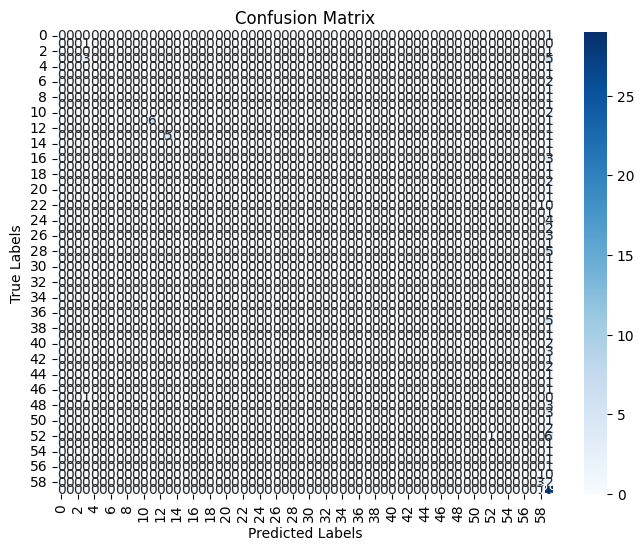

In [5]:
# code for task 2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, df['topics'], test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=500, solver='saga')

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()